In [6]:
import networkx as nx
import pandas as pd

df = pd.read_csv("finale_data_after_processing.csv", encoding='latin1')

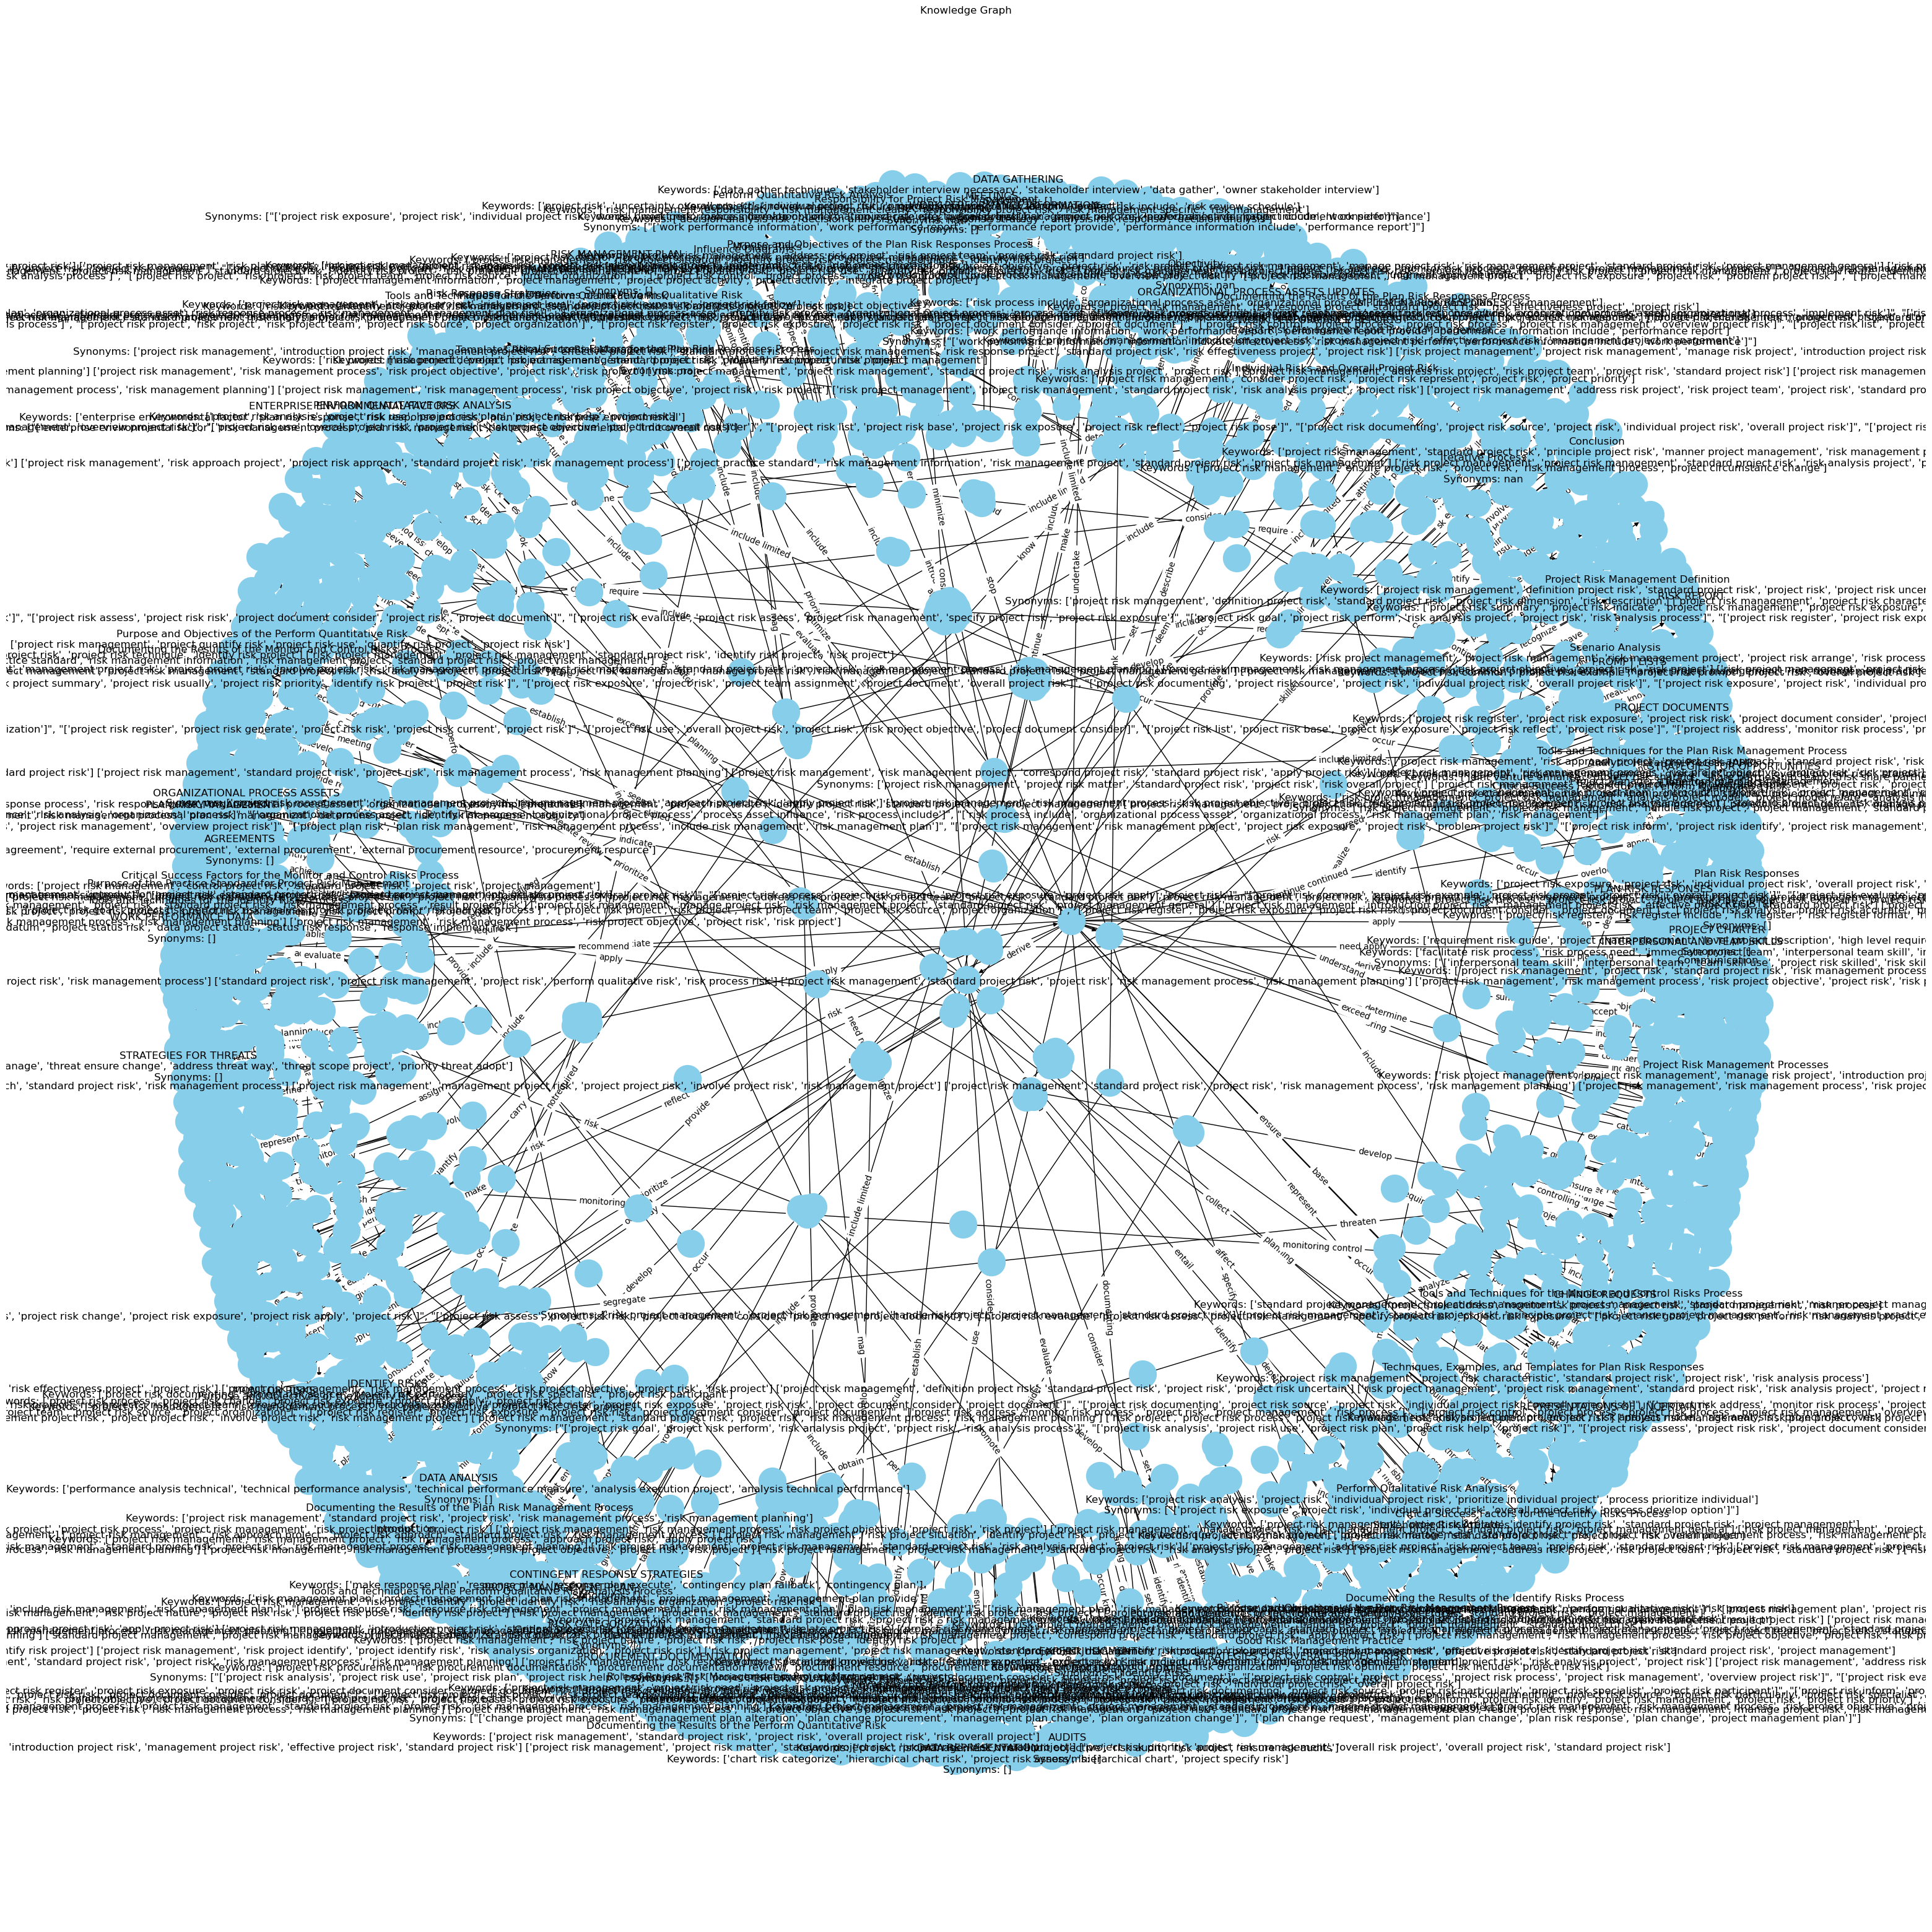

In [8]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt



# Create an empty directed graph
knowledge_graph = nx.DiGraph()

# Extract concepts, relationships, and features from the DataFrame
concepts = df['Titre'].tolist()
relationships = df[['Subject', 'Object']].values.tolist()
keywords = df['kw_bert'].tolist()
synonyms = df['synonyms'].tolist()

# Iterate through rows in the DataFrame to add nodes with attributes
for i in range(len(concepts)):
    concept = concepts[i]
    keyword = keywords[i]
    synonym = synonyms[i]
    knowledge_graph.add_node(concept, Keywords=keyword, Synonyms=synonym)

# Add edges (relationships) to the graph using the "Relation" column
for i, (subject, obj) in enumerate(relationships):
    relation_type = df.loc[i, 'Relation']
    if pd.notna(obj):
        object_concepts = obj.split(', ')
        for object_concept in object_concepts:
            knowledge_graph.add_edge(subject, object_concept, relationship=relation_type)

# Visualization
pos = nx.spring_layout(knowledge_graph)
labels = {node: f"{node}\nKeywords: {knowledge_graph.nodes[node]['Keywords']}\nSynonyms: {knowledge_graph.nodes[node]['Synonyms']}" for node in concepts}
edge_labels = {(edge[0], edge[1]): data['relationship'] for edge, data in knowledge_graph.edges.items()}

# Use a different variable name for the figure
fig, axes = plt.subplots(figsize=(40, 40), clear=True)
nx.draw(knowledge_graph, pos, with_labels=True, labels=labels, node_size=1000, node_color='skyblue', font_size=12, ax=axes)
nx.draw_networkx_edge_labels(knowledge_graph, pos, edge_labels=edge_labels, font_size=10)
plt.title("Knowledge Graph")
plt.axis('off')
plt.show()


In [9]:
pip install networkx pandas matplotlib torch dgl


Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import dgl
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Your previous code for creating the knowledge graph

# Convert the NetworkX graph to a DGL graph
G_dgl = dgl.from_networkx(knowledge_graph)

# Add self-loops to the graph
G_dgl = dgl.add_self_loop(G_dgl)

class GNN(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers):
        super(GNN, self).__init__()

        self.layers = nn.ModuleList([
            dgl.nn.GraphConv(in_feats if i == 0 else hidden_feats, hidden_feats, activation=F.relu)
            for i in range(num_layers - 1)
        ])

        self.layers.append(dgl.nn.GraphConv(hidden_feats, out_feats))

    def forward(self, g, features):
        h = features
        for layer in self.layers:
            h = layer(g, h)
        return h

# Define your model
YOUR_FEATURE_DIMENSION = 167  # Change this based on your feature dimension
model = GNN(in_feats=YOUR_FEATURE_DIMENSION, hidden_feats=64, out_feats=2, num_layers=3)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Assuming 'features' is a tensor of node features and 'labels' is a tensor of node labels
features = torch.rand(G_dgl.number_of_nodes(), YOUR_FEATURE_DIMENSION)
labels = torch.randint(0, 2, (G_dgl.number_of_nodes(),))

# Split the data into training and testing sets
train_indices, test_indices = train_test_split(range(G_dgl.number_of_nodes()), test_size=0.2, stratify=labels)
train_mask = torch.zeros(G_dgl.number_of_nodes(), dtype=torch.bool)
test_mask = torch.zeros(G_dgl.number_of_nodes(), dtype=torch.bool)
train_mask[train_indices] = True
test_mask[test_indices] = True

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(G_dgl, features.float())  # Ensure features are of type float
    loss = criterion(logits[train_mask], labels[train_mask])
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Your previous code for the recommend and evaluation functions


Epoch 1/1000, Loss: 0.6957370638847351
Epoch 2/1000, Loss: 1.5069994926452637
Epoch 3/1000, Loss: 0.7071965336799622
Epoch 4/1000, Loss: 0.9380338788032532
Epoch 5/1000, Loss: 0.7408152222633362
Epoch 6/1000, Loss: 0.6927860975265503
Epoch 7/1000, Loss: 0.7012085318565369
Epoch 8/1000, Loss: 0.7068630456924438
Epoch 9/1000, Loss: 0.7009585499763489
Epoch 10/1000, Loss: 0.6943252086639404
Epoch 11/1000, Loss: 0.6942572593688965
Epoch 12/1000, Loss: 0.6989790797233582
Epoch 13/1000, Loss: 0.699231743812561
Epoch 14/1000, Loss: 0.6953750252723694
Epoch 15/1000, Loss: 0.6932899951934814
Epoch 16/1000, Loss: 0.6950968503952026
Epoch 17/1000, Loss: 0.697153627872467
Epoch 18/1000, Loss: 0.696365475654602
Epoch 19/1000, Loss: 0.6940253973007202
Epoch 20/1000, Loss: 0.6932259202003479
Epoch 21/1000, Loss: 0.6945762634277344
Epoch 22/1000, Loss: 0.6955713033676147
Epoch 23/1000, Loss: 0.694648265838623
Epoch 24/1000, Loss: 0.693248450756073
Epoch 25/1000, Loss: 0.6931880116462708
Epoch 26/1000,

Epoch 213/1000, Loss: 0.6489627957344055
Epoch 214/1000, Loss: 0.6489147543907166
Epoch 215/1000, Loss: 0.6488677263259888
Epoch 216/1000, Loss: 0.6488224267959595
Epoch 217/1000, Loss: 0.6487756967544556
Epoch 218/1000, Loss: 0.648727536201477
Epoch 219/1000, Loss: 0.6486801505088806
Epoch 220/1000, Loss: 0.6486314535140991
Epoch 221/1000, Loss: 0.648581862449646
Epoch 222/1000, Loss: 0.6485328674316406
Epoch 223/1000, Loss: 0.6484845876693726
Epoch 224/1000, Loss: 0.6484360098838806
Epoch 225/1000, Loss: 0.6483862400054932
Epoch 226/1000, Loss: 0.6483365893363953
Epoch 227/1000, Loss: 0.6482862830162048
Epoch 228/1000, Loss: 0.648235023021698
Epoch 229/1000, Loss: 0.6481833457946777
Epoch 230/1000, Loss: 0.6481305956840515
Epoch 231/1000, Loss: 0.6480771899223328
Epoch 232/1000, Loss: 0.6480236649513245
Epoch 233/1000, Loss: 0.6479699015617371
Epoch 234/1000, Loss: 0.6479160189628601
Epoch 235/1000, Loss: 0.6478626728057861
Epoch 236/1000, Loss: 0.6478099822998047
Epoch 237/1000, Los

Epoch 425/1000, Loss: 0.5980606079101562
Epoch 426/1000, Loss: 0.5972002148628235
Epoch 427/1000, Loss: 0.5968532562255859
Epoch 428/1000, Loss: 0.5983037948608398
Epoch 429/1000, Loss: 0.5989959239959717
Epoch 430/1000, Loss: 0.5968096852302551
Epoch 431/1000, Loss: 0.598820149898529
Epoch 432/1000, Loss: 0.6041033864021301
Epoch 433/1000, Loss: 0.605648398399353
Epoch 434/1000, Loss: 0.5981993675231934
Epoch 435/1000, Loss: 0.596256673336029
Epoch 436/1000, Loss: 0.5958616137504578
Epoch 437/1000, Loss: 0.6003579497337341
Epoch 438/1000, Loss: 0.5943935513496399
Epoch 439/1000, Loss: 0.5935806632041931
Epoch 440/1000, Loss: 0.5943816900253296
Epoch 441/1000, Loss: 0.5988368391990662
Epoch 442/1000, Loss: 0.5986366271972656
Epoch 443/1000, Loss: 0.593379020690918
Epoch 444/1000, Loss: 0.5902394652366638
Epoch 445/1000, Loss: 0.5883057713508606
Epoch 446/1000, Loss: 0.5889343619346619
Epoch 447/1000, Loss: 0.5935770869255066
Epoch 448/1000, Loss: 0.5981250405311584
Epoch 449/1000, Loss

Epoch 630/1000, Loss: 0.4902172386646271
Epoch 631/1000, Loss: 0.4888381063938141
Epoch 632/1000, Loss: 0.48714151978492737
Epoch 633/1000, Loss: 0.48673537373542786
Epoch 634/1000, Loss: 0.4860052466392517
Epoch 635/1000, Loss: 0.4861924350261688
Epoch 636/1000, Loss: 0.4863722324371338
Epoch 637/1000, Loss: 0.4876890778541565
Epoch 638/1000, Loss: 0.4889269173145294
Epoch 639/1000, Loss: 0.4935236871242523
Epoch 640/1000, Loss: 0.49148887395858765
Epoch 641/1000, Loss: 0.48792606592178345
Epoch 642/1000, Loss: 0.48182639479637146
Epoch 643/1000, Loss: 0.4847131073474884
Epoch 644/1000, Loss: 0.48291340470314026
Epoch 645/1000, Loss: 0.48843613266944885
Epoch 646/1000, Loss: 0.4887566566467285
Epoch 647/1000, Loss: 0.47131770849227905
Epoch 648/1000, Loss: 0.4805220067501068
Epoch 649/1000, Loss: 0.4909820258617401
Epoch 650/1000, Loss: 0.47657084465026855
Epoch 651/1000, Loss: 0.516363263130188
Epoch 652/1000, Loss: 0.5115030407905579
Epoch 653/1000, Loss: 0.5418108105659485
Epoch 65

Epoch 833/1000, Loss: 0.38405680656433105
Epoch 834/1000, Loss: 0.38413548469543457
Epoch 835/1000, Loss: 0.38545262813568115
Epoch 836/1000, Loss: 0.38550373911857605
Epoch 837/1000, Loss: 0.3858177959918976
Epoch 838/1000, Loss: 0.38431310653686523
Epoch 839/1000, Loss: 0.38304373621940613
Epoch 840/1000, Loss: 0.38160935044288635
Epoch 841/1000, Loss: 0.38298726081848145
Epoch 842/1000, Loss: 0.38382384181022644
Epoch 843/1000, Loss: 0.3842722475528717
Epoch 844/1000, Loss: 0.3833043873310089
Epoch 845/1000, Loss: 0.3854435086250305
Epoch 846/1000, Loss: 0.385054349899292
Epoch 847/1000, Loss: 0.386179655790329
Epoch 848/1000, Loss: 0.38438907265663147
Epoch 849/1000, Loss: 0.3845066428184509
Epoch 850/1000, Loss: 0.38223156332969666
Epoch 851/1000, Loss: 0.38047415018081665
Epoch 852/1000, Loss: 0.37822985649108887
Epoch 853/1000, Loss: 0.3738632798194885
Epoch 854/1000, Loss: 0.37012287974357605
Epoch 855/1000, Loss: 0.36753904819488525
Epoch 856/1000, Loss: 0.36699798703193665
Ep

In [11]:


# After training, the model's parameters are updated and can be used to generate embeddings
embeddings = model(G_dgl, features.float()).detach()

def recommend(query, k=5):
    # Calculate cosine similarity between the query and all nodes
    query_embedding = model(G_dgl, features.float())[concepts.index(query)].detach().numpy().reshape(1, -1)
    all_embeddings = model(G_dgl, features.float()).detach().numpy()
    similarities = cosine_similarity(query_embedding, all_embeddings)[0]

    # Get indices of k nodes with the highest similarity
    top_indices = similarities.argsort()[-k:][::-1]

    # Display recommendations
    print(f"Recommendations for '{query}':")
    for idx in top_indices:
        print(f"{concepts[idx]} - Similarity: {similarities[idx]}")
    print()

# Evaluation
model.eval()
with torch.no_grad():
    logits = model(G_dgl, features.float())  # Ensure features are of type float
    predicted_probs = torch.softmax(logits, dim=1)
    predicted_classes = torch.argmax(predicted_probs, dim=1)

    # Assuming labels are binary (0 or 1) for binary classification
    ground_truth_labels = labels[test_mask].numpy()

    accuracy = accuracy_score(ground_truth_labels, predicted_classes[test_mask])
    precision = precision_score(ground_truth_labels, predicted_classes[test_mask])
    recall = recall_score(ground_truth_labels, predicted_classes[test_mask])
    f1 = f1_score(ground_truth_labels, predicted_classes[test_mask])

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


Accuracy: 0.48141263940520446
Precision: 0.4831081081081081
Recall: 0.5315985130111525
F1 Score: 0.5061946902654868
